# Absolute dispersion in the $x$ and $y$ direction

Calculating the absolute dispersion of a set of particles in the $x$- and the $y$-direction.

- Author(s): Miriam Sterl
- Created on: 21/06/2023
- Last updated on:

In [1]:
import time

print(time.ctime(time.time()))

Wed Jun 21 16:01:06 2023


In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

In [10]:
ds = xr.open_dataset('../Simulations/toy_data_01.nc')

In [11]:
ds

<xarray.Dataset>
Dimensions:     (traj: 144, obs: 121)
Dimensions without coordinates: traj, obs
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float32 ...
    lon         (traj, obs) float32 ...
    z           (traj, obs) float32 ...
    U           (traj, obs) float32 ...
    V           (traj, obs) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.1.dev20+g92f2fb90
    parcels_mesh:           spherical

144 particles, 121 time instances

First compute dx, dy. Ideally this can be done with another function like for displacement.

In [19]:
ds['lat'][0]

<xarray.DataArray 'lat' (obs: 121)>
array([-39.166668, -39.023876, -38.904987, -38.79355 , -38.70986 , -38.656185,
       -38.589375, -38.52561 , -38.483578, -38.43259 , -38.37073 , -38.32396 ,
       -38.28491 , -38.236984, -38.200073, -38.176617, -38.137196, -38.09768 ,
       -38.068645, -38.049515, -38.046978, -38.052563, -38.042976, -38.03337 ,
       -38.046173, -38.083527, -38.12675 , -38.16899 , -38.21481 , -38.261997,
       -38.320553, -38.401688, -38.4777  , -38.549076, -38.625797, -38.659958,
       -38.702644, -38.7888  , -38.849525, -38.86821 , -38.867023, -38.847046,
       -38.80186 , -38.73785 , -38.68297 , -38.630493, -38.578613, -38.58329 ,
       -38.67382 , -38.784985, -38.967823, -39.20173 , -39.42535 , -39.56915 ,
       -39.64693 , -39.725727, -39.83473 , -39.98246 , -40.100506, -40.113857,
       -40.08257 , -40.01735 , -39.90611 , -39.721577, -39.421486, -39.05179 ,
       -38.66335 , -38.274094, -37.89955 , -37.599785, -37.40675 , -37.293716,
       -37.27187 , -37.3403  , -37.436565, -37.554977, -37.673717, -37.76343 ,
       -37.881466, -37.966652, -38.03239 , -38.123184, -38.183384, -38.19522 ,
       -38.205383, -38.222927, -38.201717, -38.14522 , -38.087788, -38.02486 ,
       -37.918182, -37.773907, -37.607418, -37.4304  , -37.23153 , -37.04823 ,
       -36.922234, -36.804348, -36.649467, -36.526554, -36.448   , -36.367283,
       -36.32344 , -36.357586, -36.442554, -36.55528 , -36.68296 , -36.789318,
       -36.892906, -37.030228, -37.15991 , -37.248165, -37.32098 , -37.385845,
       -37.418827, -37.425182, -37.43527 , -37.46129 , -37.456646, -37.43389 ,
       -37.488907], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long_name:      
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

In [ ]:
# Plot trajectory of 1 particle to check

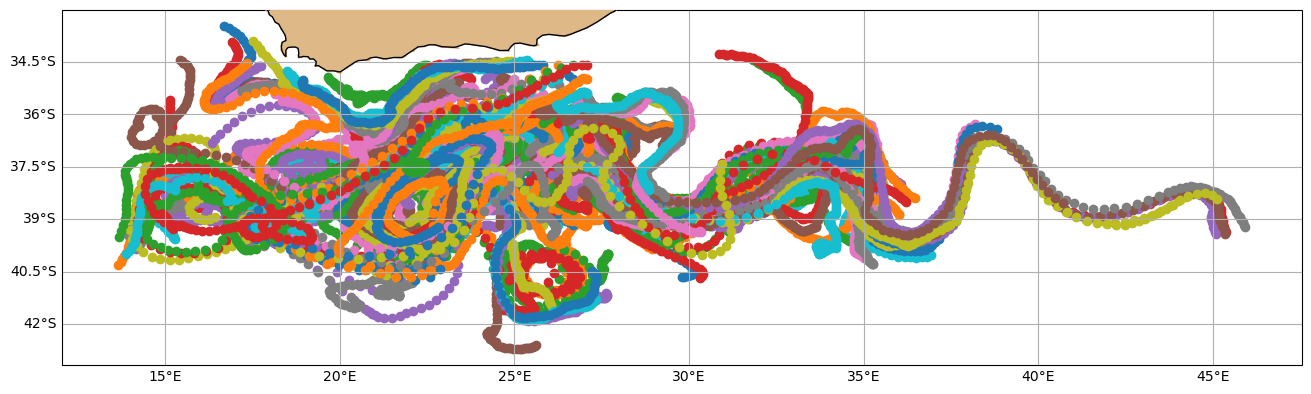

In [21]:
fig = plt.figure(figsize=(16,17)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m', color='black', linewidth=1, zorder=50)
ax1.add_feature(cartopy.feature.LAND, facecolor='burlywood', zorder=20) 
    
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

for i in range(144):
    ax1.scatter(ds['lon'][i],ds['lat'][i])